In [1]:
import pandas as pd

data=pd.read_csv('trips_data.csv')

In [2]:
data.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


Data Cleaning

In [5]:
print(data['Product Type'].value_counts())

UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
Juntos                    1
UberBLACK                 1
uberx                     1
Name: Product Type, dtype: int64


In [8]:
product_mapping={'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','uberx':'UberX',
'uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool','POOL: MATCHED': 'Pool','UberBLACK':'Black'}

data['Product Type'].replace(product_mapping,inplace=True)

In [9]:
print(data['Product Type'].value_counts())

UberX                   466
Pool                     70
UberEATS Marketplace     10
Black                     4
Juntos                    1
Name: Product Type, dtype: int64


In [12]:
data=data[data['Product Type']!='UberEATS Marketplace']

In [13]:
print(data['Product Type'].value_counts())

UberX     466
Pool       70
Black       4
Juntos      1
Name: Product Type, dtype: int64


In [14]:
from datetime import datetime
from datetime import timedelta

def date_convertion(df,cols):
    for col in cols:
        df[col]=df[col].apply(lambda x: x.replace(' +0000 UTC',''))
        df[col]=pd.to_datetime(df[col])
    return df

data=date_convertion(data,['Request Time','Begin Trip Time','Dropoff Time'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  544 non-null    int64         
 1   Product Type          541 non-null    object        
 2   Trip or Order Status  544 non-null    object        
 3   Request Time          544 non-null    datetime64[ns]
 4   Begin Trip Time       544 non-null    datetime64[ns]
 5   Begin Trip Lat        515 non-null    float64       
 6   Begin Trip Lng        515 non-null    float64       
 7   Dropoff Time          544 non-null    datetime64[ns]
 8   Dropoff Lat           515 non-null    float64       
 9   Dropoff Lng           515 non-null    float64       
 10  Distance (miles)      544 non-null    float64       
 11  Fare Amount           544 non-null    float64       
 12  Fare Currency         541 non-null    object        
dtypes: datetime64[ns](3)

In [17]:
data['year']=data['Request Time'].map(lambda x: datetime.strftime(x,"%Y"))
data['month']=data['Request Time'].map(lambda x: datetime.strftime(x,"%b"))
data['weekday']=data['Request Time'].map(lambda x: datetime.strftime(x,"%a"))
data['time']=data['Request Time'].map(lambda x: datetime.strftime(x,"%H:%M"))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 553
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  544 non-null    int64         
 1   Product Type          541 non-null    object        
 2   Trip or Order Status  544 non-null    object        
 3   Request Time          544 non-null    datetime64[ns]
 4   Begin Trip Time       544 non-null    datetime64[ns]
 5   Begin Trip Lat        515 non-null    float64       
 6   Begin Trip Lng        515 non-null    float64       
 7   Dropoff Time          544 non-null    datetime64[ns]
 8   Dropoff Lat           515 non-null    float64       
 9   Dropoff Lng           515 non-null    float64       
 10  Distance (miles)      544 non-null    float64       
 11  Fare Amount           544 non-null    float64       
 12  Fare Currency         541 non-null    object        
 13  year                

In [19]:
data.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency,year,month,weekday,time
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL,2021,Jan,Wed,22:06
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,BRL,2021,Jan,Wed,20:21
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,BRL,2021,Jan,Sun,00:23
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,BRL,2020,Dec,Fri,23:16
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,BRL,2020,Dec,Fri,00:35


In [20]:
data['distance_km']=round(data['Distance (miles)']*1.60934,2)
data['amount_km']=round(data['Fare Amount']/data.distance_km,2)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 553
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  544 non-null    int64         
 1   Product Type          541 non-null    object        
 2   Trip or Order Status  544 non-null    object        
 3   Request Time          544 non-null    datetime64[ns]
 4   Begin Trip Time       544 non-null    datetime64[ns]
 5   Begin Trip Lat        515 non-null    float64       
 6   Begin Trip Lng        515 non-null    float64       
 7   Dropoff Time          544 non-null    datetime64[ns]
 8   Dropoff Lat           515 non-null    float64       
 9   Dropoff Lng           515 non-null    float64       
 10  Distance (miles)      544 non-null    float64       
 11  Fare Amount           544 non-null    float64       
 12  Fare Currency         541 non-null    object        
 13  year                

In [22]:
data.head(1)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL,2021,Jan,Wed,22:06,7.79,3.8


In [23]:
data['request_lead_time']=data['Begin Trip Time']-data['Request Time']
data['request_lead_time']=data['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

In [24]:
data.head(1)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL,2021,Jan,Wed,22:06,7.79,3.8,4.4


In [25]:
data['trip_duration']=data['Dropoff Time']-data['Begin Trip Time']
data['trip_duration']=data['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))

In [26]:
data.head(1)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,...,Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,...,29.63,BRL,2021,Jan,Wed,22:06,7.79,3.8,4.4,18.1


In [27]:
import numpy as np

data.loc[(data['Trip or Order Status'] == 'CANCELED') | (data['Trip or Order Status']=='DRIVER_CANCELED'),'request_lead_time']=np.nan
data.loc[(data['Trip or Order Status'] == 'CANCELED') | (data['Trip or Order Status']=='DRIVER_CANCELED'),'amount_km']=np.nan
data.loc[(data['Trip or Order Status'] == 'CANCELED') | (data['Trip or Order Status']=='DRIVER_CANCELED'),['Begin Trip Time','Dropoff Time']]=np.nan

In [40]:
completed_rides=data[(data['Trip or Order Status']!='CANCELED')&(data['Trip or Order Status']!='DRIVER_CANCELED')&(data['Trip or Order Status']!='UNFULFILLED')]

How many times have the user traveled in the past?

In [41]:
print('Total Trips: ',completed_rides['Trip or Order Status'].count())

Total Trips:  444


In [42]:
print(completed_rides.year.value_counts().sort_index(ascending=True))

2016     17
2017    120
2018    146
2019    106
2020     52
2021      3
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

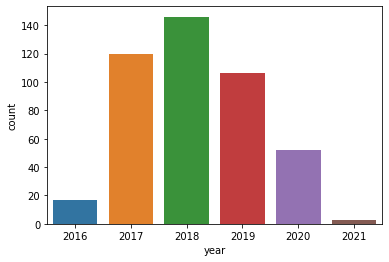

In [43]:
import seaborn as sns

sns.countplot(data=completed_rides,x='year',order=['2016','2017','2018','2019','2020','2021'])

How many trips were completed or canceled?

In [44]:
print('Total Trips: ',data['Trip or Order Status'].count())

Total Trips:  544


In [45]:
print(round(data['Trip or Order Status'].value_counts()/data['Trip or Order Status'].size*100,1))

COMPLETED          81.6
CANCELED           16.0
DRIVER_CANCELED     1.8
UNFULFILLED         0.6
Name: Trip or Order Status, dtype: float64


<AxesSubplot:xlabel='year'>

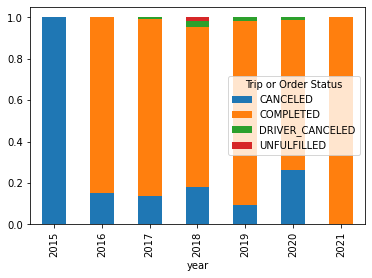

In [46]:
data.groupby(by=['year'])['Trip or Order Status'].value_counts(normalize=True).unstack('Trip or Order Status').plot.bar(stacked=True)

Where did most of the layoffs take place?

In [37]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Madhu\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [38]:
import folium

In [47]:
from folium import plugins

coord=[]
for lat,lng in zip(completed_rides['Dropoff Lat'].values,completed_rides['Dropoff Lng'].values):
    coord.append([lat,lng])

map=folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width="80%",
    height="50%",
    control_scale=True)
map.add_child(plugins.HeatMap(coord))

What type of product is most often selected?

In [48]:
pt_rides=pd.Series(completed_rides['Product Type'].value_counts().sort_index(ascending=False))

In [49]:
print(pt_rides)

UberX    401
Pool      39
Black      4
Name: Product Type, dtype: int64


In [50]:
df=pd.DataFrame(pt_rides)

In [51]:
df['%']=(completed_rides['Product Type'].value_counts().sort_index(ascending=False)/completed_rides['Product Type'].size*100).round(1)
df.rename(columns={'Product Type':'Total Rides'},inplace=True)

In [52]:
print(df)

       Total Rides     %
UberX          401  90.3
Pool            39   8.8
Black            4   0.9


<AxesSubplot:>

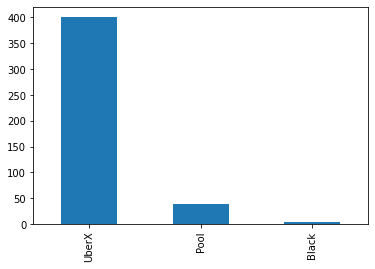

In [53]:
completed_rides['Product Type'].value_counts().plot(kind='bar')

How much is the fare, distance, amount, and time spent on the ride?

In [54]:
print('Avg. fare:',round(completed_rides['Fare Amount'].mean(),1),'BRL')

Avg. fare: 19.2 BRL


In [55]:
print('Avg. distance:',round(completed_rides['distance_km'].mean(),1),'km')

Avg. distance: 8.1 km


In [56]:
print('Avg. fare/km:',round(completed_rides['Fare Amount'].sum()/completed_rides['distance_km'].sum(),1),'BRL/Km')

Avg. fare/km: 2.4 BRL/Km


In [57]:
print('Avg. time spent on trips:',round(completed_rides['trip_duration'].mean(),1),'minutes')

Avg. time spent on trips: 21.4 minutes


In [59]:
print('Total Fare Amount:',round(completed_rides['Fare Amount'].sum(),1),'BRL')

Total Fare Amount: 8532.8 BRL


In [60]:
print('Total Distance:',round(completed_rides['distance_km'].sum(),1),'km')

Total Distance: 3575.0 km


In [61]:
print('Total Time spent on Trips:',round(completed_rides['trip_duration'].sum()/60,1),'hours')

Total Time spent on Trips: 158.4 hours


Which days of the week have the highest number of rides per kilometer?

In [62]:
amount_table=completed_rides.pivot_table(values='Fare Amount',aggfunc='sum',columns='weekday',index='year').round(1)

In [63]:
column_order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
amount_table=amount_table.reindex(column_order,axis=1)

distance_table=completed_rides.pivot_table(values='distance_km',aggfunc='sum',columns='weekday',index='year').round(1)
distance_table=distance_table.reindex(column_order,axis=1)

In [64]:
(amount_table/distance_table).round(1)

weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
year,,,,,,,
2016,NaN,NaN,2.8,2.4,NaN,2.1,2.9
2017,2.8,2.1,2.4,2.2,2.7,2.1,2.7
2018,2.0,1.9,2.6,2.0,2.2,2.4,2.2
2019,2.5,2.4,2.1,2.3,3.1,2.3,2.7
2020,2.7,2.4,2.7,2.6,2.4,3.1,2.8
2021,NaN,NaN,3.1,NaN,NaN,NaN,3.6


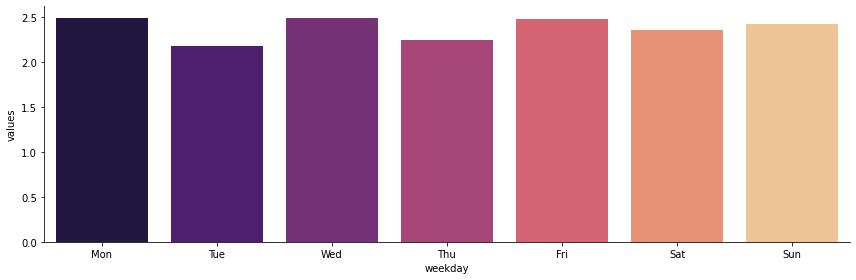

In [67]:
aux_series=round((completed_rides.groupby('weekday')['Fare Amount'].sum()/completed_rides.groupby('weekday')['distance_km'].sum()),2)
amount_km_df=pd.DataFrame(aux_series)
amount_km_df=amount_km_df.reset_index()
amount_km_df.rename(columns={'weekday':'weekday',0:'values'},inplace=True)

sns.catplot(x='weekday',y='values',data=amount_km_df,kind='bar',height=4,aspect=3,order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='magma')


Which is the longest/shortest and most expensive/cheapest ride?

In [70]:
rides_distance=completed_rides[completed_rides.distance_km==completed_rides.distance_km.max()]
rides_distance=rides_distance.append(completed_rides[completed_rides.distance_km==completed_rides.distance_km.min()])

In [71]:
rides_distance

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,...,Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,...,58.77,BRL,2020,Dec,Fri,23:16,31.77,1.85,11.0,65.2
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.503310,-46.636808,...,11.27,BRL,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6


In [72]:
rides_amount_km = completed_rides[completed_rides.amount_km==completed_rides.amount_km.max()]
rides_amount_km = rides_amount_km.append(completed_rides[completed_rides.amount_km==completed_rides.amount_km.min()])

In [73]:
rides_amount_km

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,...,Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.503310,-46.636808,...,11.27,BRL,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6
87,458,UberX,COMPLETED,2019-11-30 03:34:56,2019-11-30 03:40:37,-23.591813,-46.690720,2019-11-30 03:53:24,-23.559366,-46.666489,...,0.00,BRL,2019,Nov,Sat,03:34,5.70,0.00,5.7,12.8


What is the average lead time before requesting a trip

In [74]:
print(round(completed_rides.request_lead_time.mean(),1),'minutes')

4.9 minutes
